In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from utils import OUT_PATH
import pandas as pd
import seaborn as sns

In [2]:
data= pd.read_csv(OUT_PATH + '/grpPCA/supsubj_concat/grp_concat_Xtrans_PCA3.csv').query('freq == "high_gamma"').drop(columns = ['Unnamed: 0', 'freq', 'compo', 'subj', 'expl_var']).values
data = np.concat([[data[:, :int(data.shape[1]/2)]], [data[:, int(data.shape[1]/2):]]], axis=0)
coni1 = pd.DataFrame(data[0, :, :].T)
coni2 = pd.DataFrame(data[1, :, :].T)

Text(0.5, 0, 'lags')

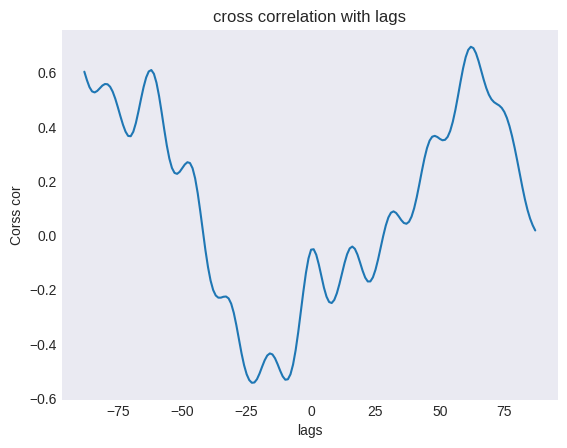

In [30]:
def crosscorr(datax, datay, lag=0, wrap=False):
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))
    
cc = []
lags = np.arange(int(-176/2), int(176/2))

for l in lags : 
    cc.append(crosscorr(coni1[0], coni1[2], lag=l))

plt.plot(lags, cc)
plt.title('cross correlation with lags')
plt.ylabel('Corss cor')
plt.xlabel('lags')


Text(0.5, 1.0, 'Max corss correlation between componant')

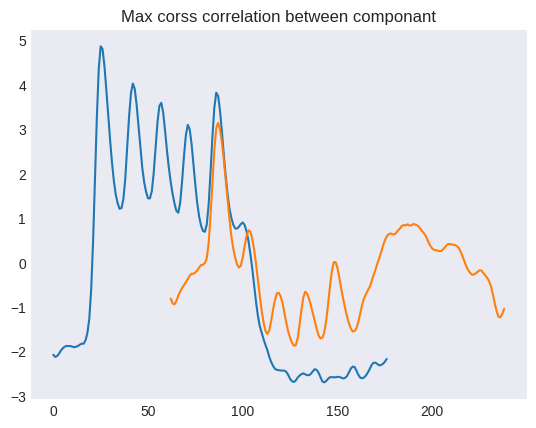

In [31]:

plt.plot(np.arange(177) , coni1[0])
plt.plot(np.arange(177)+ lags[cc.index(max(cc))], coni1[2])
plt.title('Max corss correlation between componant')

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = df['S1_Joy'].interpolate().values
d2 = df['S2_Joy'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

/users/barbara/miniforge3/envs/mne_iEEG/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/users/barbara/miniforge3/envs/mne_iEEG/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/users/barbara/miniforge3/envs/mne_iEEG/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


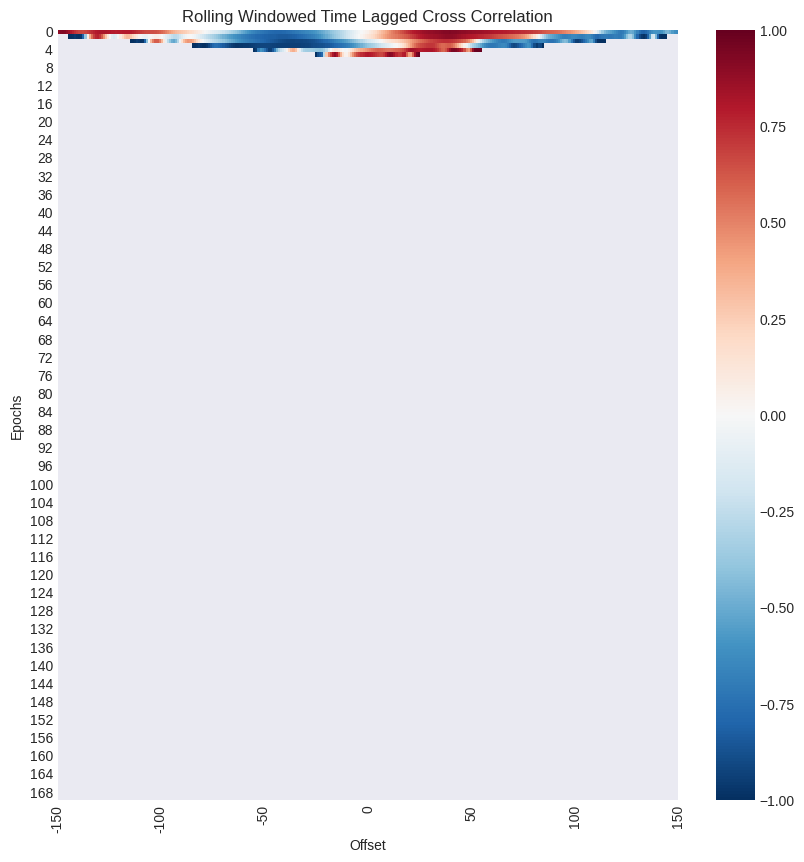

In [28]:
# ON THE ACTIVATION OR ON INDIVIDUAL TRIALS 

seconds = 5
fps = 30
window_size = 300 #samples
t_start = 0
t_end = t_start + window_size
step_size = 30
rss=[]
while t_end < 5400:
    d1 = coni1[0].iloc[t_start:t_end]
    d2 = coni1[1].iloc[t_start:t_end]
    rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Epochs')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);